<a href="https://colab.research.google.com/github/Stratoudakis/app/blob/master/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_lab3_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP 2024
# Lab 3: Attention and Pre-trained Models

Our practical journey in NLP has so far covered the following:
- Lab 1: Train a bag-of-words model (with variations): In that case, we learned word meanings from the data itself.
- Lab 2: Train an embedding-based model: We still learn from the data itself but hopefully with more effective ways to capture semantics and context.
- Lab 2: Use pre-trained embeddings: We still learn from the data, and pre-training helps generalize.

Now, it's time to not only use a set of pre-trained word vectors (aka representations) but to also use a pre-trained model (like BERT). The model is pre-trained on vast amounts of data and that allows for better generalization. At the same, as we discussed in class, BERT models are based on transformers, which use attention to model sequences (in our case sequences of words). BERT provides for contextualized embeddings, aka the embeddding vector of a word is only determined once the actual context of that word is known: Practically, this allows for words to have different embedding vectors depending on their actual context (e.g. think of the word "bank" and it's multiple meanings in different contexts).

In this lab, we will learn how to load and use pre-trained models (e.g. BERT) from Huggingface. We will be using the same dataset/task as the previous lab, also for comparison reasons.

By the end of this lab you should be able to:

- Load and/or use pre-trained models and tokenizers to solve different NLP tasks
- Inspect and analyze the innter workings (hidden layers etc.) of attention models (like BERT)
- Use attention models to get sentence representations (aka sentence embeddings)
- Use BERT sentence embeddings to solve more complicated tasks like information retrieval
- Compare performance of differemt models on different NLP tasks and assess their effectiveness
- Load and use the basics of `pytorch` (important framework in NLP)

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 3      |
| [Exercise 2](#e2)   | 3      |
| [Exercise 3](#e3)   | 10     |
| [Exercise 4](#e4)   | 5      |
| [Exercise 5](#e5)   | 5      |
| [Exercise 6](#e6)   | 3      |
| [Exercise 7](#e7)   | 3      |
| [Exercise 8](#e8)   | 3      |
| [Exercise 9](#e9)   | 5      |
| [Exercise 10](#e10) | 5      |
| [Exercise 11](#e11) | 5      |
| [Exercise 12](#e12) | 10     |
| [Exercise 13](#e12) | 10     |
| Total               | 70     |

This score will be scaled down to 1 and that will be your final lab score.

### Instructions for delivery (Deadline: 31/May late night, wildcards possible)

+ Make sure that you include a proper amount/mix of comments, results and code.
+ In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.
+ You are asked to deliver only your executed notebook file, .ipnyb and nothing else. Enjoy!
+ Honor code applies to these tasks. Only individual work should be submitted.
+ While you may talk with others about this lab, we ask that you write your solutions individually. If you do discuss specific tasks with others please include their names below.
+ It is mandatory to list and disclose any website (or other resource) you used (e.g. stackoverflow) as well as any genAI tools (e.g. chatGPT) used.

Collaborators: list collaborators here

**I talked with Jerry about...**

Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow): list websites where you found code (or other info) as well as include information on how you used genAI tools (e.g. prompts):

I asked chatGPT about...

## 0. Setup (Huggingface + PyTorch  = ❤️)

You should know the drill by now. As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below:

In [ ]:
! pip install -U datasets~=2.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00


Next, we will need [PyTorch](https://pytorch.org/) installed. It is a very popular deep learning library that offers modularized versions of many of the sequence models we discussed in class. It's an important tool that you may want to practice further if you want to dive deeper into NLP, since much of the current academic and industrial research uses it.

Some resources to look further are given below.

* [Documentation](https://pytorch.org/docs/stable/index.html) (We will need this soon)

* [Installation Instructions](https://pytorch.org/get-started/locally/)

* [Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

The cell below should install the library:

In [ ]:
! pip install torch torchvision torchaudio

The last bit we need is the huggingface transformers library (here is the documentation [https://huggingface.co/docs/transformers/en/index](https://huggingface.co/docs/transformers/en/index)). Transformers are one of the most influential architectures in handling sequences (not only in language). As we discussed in lectures, they excel at taking into account context (which is the salt-and-pepper of NLP) with mechansisms such as self-attetion, which allows them to weigh the importance of different words in a sentence. If you want to know more, revisit the course material (slides and textbook).

We already used huggingface datasets in previous labs and huggingface transformers integrates nicely with that. Apart from the ease of use, huggingface is also providing pre-trained models of different kinds. The list can be found [here](https://huggingface.co/models) ([https://huggingface.co/models](https://huggingface.co/models)). The following line should be enough to install huggingface transformers library:

In [ ]:
! pip install transformers~=4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.0
    Uninstalling transformers-4.41.0:
      Successfully uninstalled transformers-4.41.0


As usual, we start by importing some essential Python libraries that we will be using.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import datasets
import transformers
import tqdm
import torch

## 1. Load and Preprocess Data

For easiness and comparison purposes, we will ue the same dataset as in the previous lab. That will help us re-visit the approach and see whether contextualized architectures can do better in the same problem/task/dataset.

As a reminder:

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf). If you haven't done so for Lab 2, we strongly recommend going over the paper to gain further insights

### 1.1 Loading the Dataset

The dataset will be loaded as a huggingface datgaset. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [ ]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [ ]:
for i in range(10):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with a `train` split so we will have to split that into `train`/`test` ourselves with the line below.

In [ ]:
split_ds = ds['train'].train_test_split(test_size=0.2)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


### 1.2 Preprocessing the dataset

In this section we will prepare the dataset. Note that previously, we had very much full control over the vocabulary of the dataset (in terms of pre-processing including tokenization). That is because we wanted to build our own embedding model.

By using a *pre-trained* model (like we are going to do at this lab), we need to adhere to the way this model was trained (including the tokenization). Huggingface provides the models, along with the relevant tokenizers, therefore cleaning is not necessary (as in previous labs). You can still include it if you think this would improve the results of the retrieval in the later parts of the lab.

<a name='e1'></a>
### Exercise 1 (3 points)
Instead of cleaning, we will unpack the `set` (containing tuples of full and compressed sentences) column into separate `sentence` and `compressed` columns. This will make it a bit easier for us later.

One key difference in this function is the fact that it will accept a batch of examples (instead of a single example in the exercises in the previous lab). You can iterate through the examples this way:

```
for set in examples['set']
```

The new columns should be lists containing strings (full or compressed sentences) extracted from the `set` column.

Fill in the function below to complete this task

In [ ]:
def unpack(examples):
    """
    Unpacks the column `set` into two columns `sentence` and `compressed`.
    Args:
        examples: a batch of examples from the dataset

    Returns: modified examples with two new columns: `sentence` and `compressed`

    """
    sentences = []
    compressed_sentences = []

    ### YOUR CODE HERE

    for set in examples['set']:

        sentence, compressed_sentence = set

        sentences.append(sentence)

        compressed_sentences.append(compressed_sentence)


    ### YOUR CODE ENDS HERE

    examples['sentence'] = sentences
    examples['compressed'] = compressed_sentences
    return examples

In the next cell, we will apply the `unpack` function to the whole dataset. Notice that we also drop the original `set` column.

In [ ]:
split_ds = split_ds.map(unpack, batched=True, remove_columns=['set'])
print(split_ds)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 36000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted.

In [ ]:
for i in range(10):
    print(split_ds['train'][i])

{'sentence': 'Good Friday went bad for an Oshawa man who now finds himself at odds with the law after Peterborough police found someone urinating on a business in the downtown.', 'compressed': 'Good Friday goes bad for Oshawa man'}
{'sentence': "South Australia's fauna emblem the southern hairy-nosed wombat is starving in the Murraylands, according to an animal welfare group.", 'compressed': 'Wombats starving in Murraylands'}
{'sentence': 'Udinese have snapped up Swiss midfielder Gelson Fernandes on loan until the end of the current campaign.', 'compressed': 'Udinese snap up Gelson Fernandes on loan'}
{'sentence': 'Jacob Zuma, the ANC president, on Friday ruled out an early national and provincial election.', 'compressed': 'Zuma rules out early elections'}
{'sentence': "No, I don't think music can be an instrument of peace.", 'compressed': 'Can music be an instrument of peace?'}
{'sentence': 'Senator Brad Ashford of Omaha, chairman of the Judiciary Committee, says too many teens are lo

In this lab, we will be using only pre-trained models. That means that we won't be training any new model. This is the reason we can select only the `test` subset for the rest of the notebook (this is where we will be assessing the performance of the pre-trained models). At the same time, we will save much time, as we will not be processing the `train` subset.

In [ ]:
test_ds = split_ds['test']
print(test_ds)

Dataset({
    features: ['sentence', 'compressed'],
    num_rows: 36000
})


### 1.3 Loading the Tokenizer

For the first part of this lab, we will be using a pre-trained BERT model from Huggingface, namely the [BERT Uncased](https://huggingface.co/google-bert/bert-base-uncased). You can read the original paper that introduced this model [here](https://aclanthology.org/N19-1423.pdf). This paper has been once of the most cited papers ever (currently having more than 100,000 citations).

We will specify the model name that can be found on the model's card on huggingface (revisit the first link). Make sure to check what other information Huggingface is offering (e.g. how to use the model, limitations, how to inference, etc.).

In [ ]:
model_name = 'google-bert/bert-base-uncased'

The models on huggingface come with their own tokenizers. They are loaded separately from the models. We can use [AutoTokenizer](https://huggingface.co/docs/transformers/v4.40.2/en/model_doc/auto#transformers.AutoTokenizer)'s `from_pretrained()` method to load it.

Inspect the output: The loaded object is of `BertTokenizerFast` class. Check the documentation [here](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizerFast).

* What is the vocabulary size?

* What are the special tokens and their functions?

Check the original paper to know more and discuss also with your TAs.

In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
print(tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)


Next, let's see how we can use it to tokenize some text.

In [ ]:
print(test_ds[0]['sentence'])
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt')
print("---")
print(type(tokenized))
print("---")
print(tokenized)

Microsoft chops hosted software price, London Transport gets lost property system, file-sharers are big spenders too, and hacker charged in cloning scheme.
---
<class 'transformers.tokenization_utils_base.BatchEncoding'>
---
{'input_ids': tensor([[  101,  7513, 24494,  2015,  4354,  4007,  3976,  1010,  2414,  3665,
          4152,  2439,  3200,  2291,  1010,  5371,  1011,  3745,  2869,  2024,
          2502,  5247,  2545,  2205,  1010,  1998, 23307,  5338,  1999, 18856,
         13369,  5679,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


Examine the outputs: The tokenizer returned three things:
- `input_ids` - this is a PyTorch tensor ([https://pytorch.org/docs/stable/tensors.html](https://pytorch.org/docs/stable/tensors.html)) with the indices of our tokens. PyTorch tensors are similar to numpy arrays. They hold data in a multidimensional array or matrix. The difference is that PyTorch tensors can be placed and modified on the GPU which greatly improves the speed of execution.
- `token_type_ids` - this tensor holds the information about the index of the sentence. This has to do with the classification objective from the original paper, where two sentences were given and the model had to predict if they are connected. Because we only included a single sentence, we have only zeros here. We will not be concerned with it in this lab.
- `attention_mask` - holds the mask that the model will use to determine if the tokens in the `input_ids` are the real tokens or *padding*. Padding is a technique used to ensure that all input sequences have the same length. BERT (like many other NLP models) process data in batches and requires each sequence in a batch to have the same length, so sequences that are shorter than the maximum sequence length in the batch are padded with special tokens. In this case, because we only inputted a single sentence, the mask contains only ones. Later you will see examples where this is not the case.

Let's see how exactly the sentence was tokenized and how we can retrieve the original text. Notice that some words have been split into multiple tokens (remember when we discussed sub-word tokenization in class?). Also pay attention to the added special tokens, namely `CLS` and `SEP`:

The `[CLS]` token is a special classification token added at the beginning of every input sequence. It stands for "classification" (daah!) and is used by BERT to aggregate information from the entire sequence. The final hidden state corresponding to this token (after passing through the transformer layers) is used as the aggregate sequence representation for classification tasks. We will use this later in the lab!

The `[SEP]` token is used to separate different segments or sentences within the input sequence. It stands for "separator" (daaah again!).

In [ ]:
print(tokenized['input_ids'].shape)
print("---")
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print("---")
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0]))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

torch.Size([1, 34])
---
['[CLS]', 'microsoft', 'chop', '##s', 'hosted', 'software', 'price', ',', 'london', 'transport', 'gets', 'lost', 'property', 'system', ',', 'file', '-', 'share', '##rs', 'are', 'big', 'spend', '##ers', 'too', ',', 'and', 'hacker', 'charged', 'in', 'cl', '##oning', 'scheme', '.', '[SEP]']
---
34
---
[CLS] microsoft chops hosted software price, london transport gets lost property system, file - sharers are big spenders too, and hacker charged in cloning scheme. [SEP]
---
microsoft chops hosted software price, london transport gets lost property system, file - sharers are big spenders too, and hacker charged in cloning scheme.


Tokenizer can process a list of sentences. This will create a batched output with tensor's first dimension corresponding to the batch size (the number of sentences we passed to the tokenizer). Examine the following cell and make sure it makes sense to you.

In [ ]:
print(test_ds[0:3]['sentence'])
tokenized = tokenizer(test_ds[0:3]['sentence'], padding=True, return_tensors='pt')
print(tokenized)
print(tokenized['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print(tokenizer.decode(tokenized['input_ids'][0]))
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

['Microsoft chops hosted software price, London Transport gets lost property system, file-sharers are big spenders too, and hacker charged in cloning scheme.', "A 43-year-old Jordanian merchant has been charged with premeditated murder for allegedly beating his second wife to death over ``family differences,'' a judicial official said on Tuesday.", 'New details are emerging about a downtown Wilmington bar fight that landed three bouncers in jail and another man in the hospital.']
{'input_ids': tensor([[  101,  7513, 24494,  2015,  4354,  4007,  3976,  1010,  2414,  3665,
          4152,  2439,  3200,  2291,  1010,  5371,  1011,  3745,  2869,  2024,
          2502,  5247,  2545,  2205,  1010,  1998, 23307,  5338,  1999, 18856,
         13369,  5679,  1012,   102,     0,     0,     0,     0,     0,     0,
             0],
        [  101,  1037,  4724,  1011,  2095,  1011,  2214, 26276,  6432,  2038,
          2042,  5338,  2007, 26563,  2098, 15198,  4028,  2005,  9382,  6012,
          

### 1.4 Loading the Model

In this section, we will load and examine the model. We will start with selecting the device we will place the model on. This will be a GPU (if one is available) or a CPU.

Google Colab offers free access to GPU, provided there is availability (also baed on quotas which may vary based on your usage and the overall demand on Colab's resources). If you are working locally, then if you don't have a GPU, CPU will be selected. For the first parts of the assignment running on CPU might be okay but when we have to load the dataset a GPU will be necessary.

The following cell will select the device for us.

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cpu


Now, let's load the model from huggingface and place it (slowly because it's heavy due to the large number of parameters) on the device from the previous cell (the methods `to()`).

In [ ]:
model = transformers.AutoModel.from_pretrained(model_name)
model.to(device)
print(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

<a name='e2'></a>
### Exercise 2 (3 points)

Examine the output of the previous cell. Answer the following questions:
- What is the number of transformer layers in this model?
- What is the dimension of the embeddings?
- What is the hidden size of the FFN in the transformer layer?
- What is the total number of parameters of the model (hint: check the `num_parameters()` method of the model)?

- What is the number of transformer layers in this model?

  This can be determined by the number of 'BertLayer' instances in the Bertencoder:
  (encoder): BertEncoder((layer): ModuleList((0-11): 12 x BertLayer . Therefore, 12 transformer layers.

- What is the dimension of the embeddings?

  The dimension of the embedding can be found here:

 (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)

  Hence, all the embeddings have a dimension of 768

- What is the hidden size of the FFN in the transformer layer?


  (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation(). The hidden size of FFN is 3072
- What is the total number of parameters of the model (hint: check the num_parameters() method of the model)?






In [ ]:
total_params = model.num_parameters()
print(f'Total number of parameters: {total_params}')

Total number of parameters: 109482240


Next, let's use BERT model for inference. We will tokenize the first sentence of our dataset and pass it to the model. We set `output_hidden_states` to `True` in order to have access to the hidden states of the model. Those represent the latent representations after embedding and transformer layers.

In [ ]:
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)

{'input_ids': tensor([[  101,  7513, 24494,  2015,  4354,  4007,  3976,  1010,  2414,  3665,
          4152,  2439,  3200,  2291,  1010,  5371,  1011,  3745,  2869,  2024,
          2502,  5247,  2545,  2205,  1010,  1998, 23307,  5338,  1999, 18856,
         13369,  5679,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


Examine the next cell and make sure everything makes sense to you. Consult the [documentation](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel.forward) in case of doubt.

In [ ]:
print(list(model_output.keys()))
print(type(model_output['pooler_output']))
print(model_output['pooler_output'].shape)
print(type(model_output['hidden_states']))
print(len(model_output['hidden_states']))
print(type(model_output['hidden_states'][0]))
print(model_output['hidden_states'][0].shape)

['last_hidden_state', 'pooler_output', 'hidden_states']
<class 'torch.Tensor'>
torch.Size([1, 768])
<class 'tuple'>
13
<class 'torch.Tensor'>
torch.Size([1, 34, 768])


## 2. Exploring BERT hidden states

In this section we will look in more detail into the embeddings (latent representations) of BERT model. As a reminder, BERT embeddings a type of contextual word embeddings generated by the BERT model. They capture the meaning of words in the actual context. Notice the contrast with the static word embeddings we worked with in the previous lab: Then, we only needed a large corpus to compute word embeddings. In the case of BERT, we need to pass the actual sequence through the model to get the equivalent vector. More specifically, we tokenize the sentence (based on the relevant model and tokenizer), add the special tokanes (`CLS` and `SEP`) and pass the sentence in the model.

We will use the following function to plot the cosine similarity between tokens in different sentences. Examine the code and make sure it makes sense to you.

In [ ]:
from typing import List
from itertools import combinations


def plot_evolving_similarities(hidden_states: List[torch.Tensor], tokens_ids_of_interest: List[int]):
    """
    Plots the evolving cosine similarity between the hidden representation of tokens in different sentences.
    Hidden states are provided as a list of tensors where each tensor corresponds to the layer of the model.
    Each tensor contains the hidden representations of each token (second dimension) of each sentence (first dimension).
    For each sentence there have to be a token of interest (can be the same).
    Args:
        hidden_states: a list of tensors containing the hidden representations of sentences
        tokens_ids_of_interest: a list of indices of tokens of interest
    """
    assert hidden_states[0].shape[0] == len(tokens_ids_of_interest), \
        'The batch size of hidden_states must be equal to the number of tokens of interest'

    num_layers = len(hidden_states)
    num_sentences = len(tokens_ids_of_interest)
    sentence_combinations = tuple(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]
    for layer in range(num_layers):
        for i, (sent1, sent2) in enumerate(sentence_combinations):
            embedding1 = model_outputs['hidden_states'][layer][sent1, tokens_ids_of_interest[sent1]]
            embedding2 = model_outputs['hidden_states'][layer][sent2, tokens_ids_of_interest[sent2]]
            cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
            similarities[i].append(cosine_similarity.detach().cpu().numpy())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i],
                 label=f'between {sent1 + 1} and {sent2 + 1}')
    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()

Here are three sentences with the word "bank". The word form is the same for all, however the meaning is different in the second sentence. Remember polysemy?

We can plot how the cosine similarity between the embeddings (and latent representations) of the word "bank" in each sentence evolves through the different layers of BERT.

The following code follows the procedure we described above.

{'input_ids': tensor([[  101,  2057,  2097,  6487,  1037,  2924,  2279,  2733,   999,   102,
             0,     0,     0],
        [  101,  1996,  2336, 16791,  6386,  2011,  1996,  2924,  1997,  1996,
          2314,  1012,   102],
        [  101,  1045,  2404,  2769,  1999,  1996,  2924,  1012,   102,     0,
             0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}
['[CLS]', 'we', 'will', 'rob', 'a', 'bank', 'next', 'week', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'the', 'children', 'skipped', 'stones', 'by', 'the', 'bank', 'of', 'the', 'river', '.', '[SEP]']
['[CLS]', 'i', 'put', 'money', 'in', 'the', 'bank', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
bank
bank


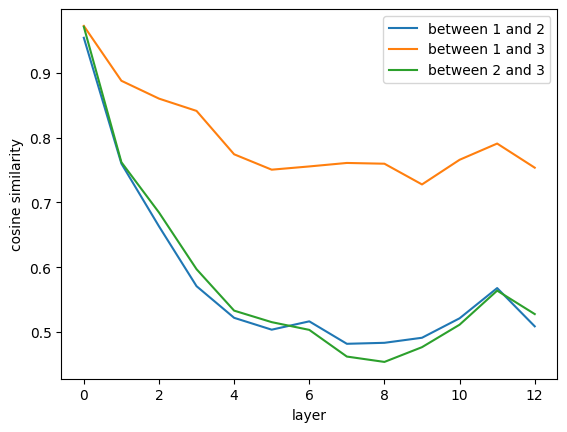

In [ ]:
text1 = "We will rob a bank next week!"
text2 = "The children skipped stones by the bank of the river."
text3 = "I put money in the bank."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [5, 7, 6]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

Next, let's plot the evolving similarities of different words: "nice", "bad", and "lovely" in the same context.

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 2919, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 8403, 2651, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]])}
['[CLS]', 'the', 'weather', 'is', 'nice', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'bad', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'lovely', 'today', '.', '[SEP]']
nice
bad
lovely


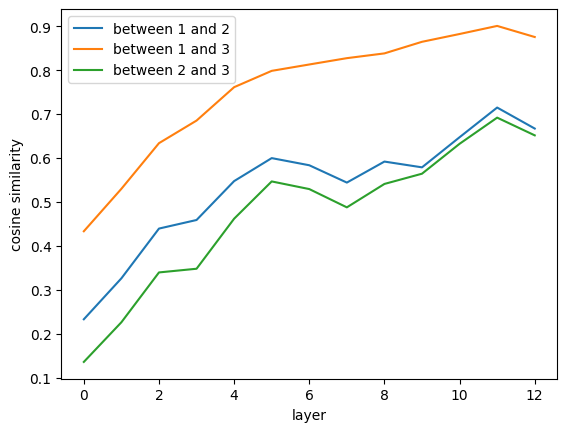

In [ ]:
text1 = "The weather is nice today."
text2 = "The weather is bad today."
text3 = "The weather is lovely today."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [4, 4, 4]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

<a name='e3'></a>
### Exercise 3 (10 points)

Take a look at the similarity between the word "bank" in the first example for the first layer (layer index 0)? This corresponds to the embedding layer of BERT. It is close to `1` but not exactly. Why is that?

Try a different set of sentences. Comment on the results of the sentences above and your own. Are the plots showing what you expected to see? Make meaningful comparisons and write your insights below. Feel free to modify the plotting above (if needed), but note that is not necessary.

{'input_ids': tensor([[  101,  1996,  7151,  5520,  2041,  1997,  1996,  5430,  2043,  1996,
          3103,  2253,  2091,  1012,   102],
        [  101,  2002,  7671,  1996,  7151,  1998,  2718,  1037,  2188,  2448,
          1012,   102,     0,     0,     0],
        [  101,  2016,  2109,  1037,  7151,  2000,  3338,  2330,  1996,  9231,
          6790,  1012,   102,     0,     0],
        [  101, 12236,  2411,  3637,  5689, 14961,  2091,  1012,   102,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}
['[CLS]'

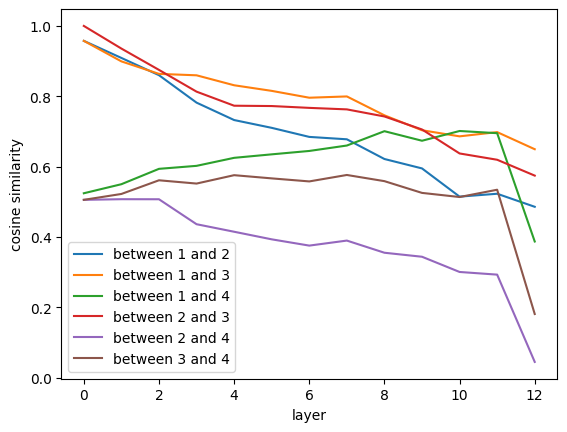

In [ ]:
### YOUR CODE HERE
text1 =  "The bat flew out of the cave when the sun went down."
text2 =  "He swung the bat and hit a home run."
text3 =  "She used a bat to break open the pinata."
text4 =  "Bats often sleep hanging upside down."

tokenized = tokenizer([text1, text2, text3 , text4], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
tokens4 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][3])

print(tokens1)
print(tokens2)
print(tokens3)
print(tokens4)


tokens_ids_of_interest = [2, 4, 4, 1]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])
print(tokens4[tokens_ids_of_interest[3]])


model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

### YOUR CODE ENDS HERE
### NOTICE: you can always add more cells if you need them

The reason the cosine similarity is not exactly one in the first layer, each word is represented by a dense vector based on its toked ID. These vectors capure some semantic information, but they do not yet include contextual information.

 Moving on, looking at the cosine simialrities of the embdeddings of the word "bank" , in the middle layers the similarity decreases as the layers progress. This is because BERT starts to incorporate contextual infromation, hence the embeddings are no longer context-independent like in the first layer. Words in different contexts begin to seperate into there own representation. In the higher layers (7-12) we observe a slight increase, a spike, in the similarities . The representation here are highly contextualized, and the model is now able to distinguish between the different meanings of the same word based on the context. Now to the more detial insights, as expected, sentence 1 and 3 ,which the word "bank" refers to the financial institution, have the highest similarities across the layers with the peak being close to 0.8. The other comparison have nearly identical similarities across the layers, and are moderately low at most 0.6.

 The difference with the sentences about the weather is in the first layer the similarities are much closer to 0 then 1. This is because the words of interest are different and because there is no contextual information in the first layer, the similarities are very low. The rest is the same , as expected text 1 and 3 which have a good sentiment about the weather have the highest similarities, with a peak at 0.9.

 Now observing the results of my sentences we can see some differences. All similarities involved with text4 where the word of interest is Bats is close to 0.5. The reason for this is the same as the one with the texts about weather, the initial embeddings are based on the fixed token represenation without context. The other similarities are close to one as exprected.

 - The similarity between 1 and 2 decreses steadily, showing that BERT distinguishes bat as an animal from a bat as sports equipment.

 - The similarity between 1 and 3 also decreases,again BERT distinguishes bat as an animal from bat as a club.

 - The similiraty between 1 and 4 remains relatively higher compared to other pairs. This is because both texts refer to bat as an animal. Futhermore, the decrease shows that BERT is incorporating more context , but the similar meaning keeps the similarity higher.

 - The similarity between 2 and 3 decreases, indicating that BERT distinguishes between bat as sports equipment from bat as a bat.

 - The similarity between 2 and 4 decreases sharply, as bat in 4 refers to an animal and text 2 refers to bat as sport equiment.

 - The similarity between 3 and 4 decreases, showing that bat as a club is different from a bat as an animal.

## 3. Calculating BERT sentence embeddings

It is finally time to use BERT's hidden states as word embeddings. First, you will write a function to aggregate the BERT's hidden representations of the words in a sentence.

<a name='e4'></a>
### Exercise 4 (5 points)


Implement the following function. It will receive the batched input to the model and its output. Calculate the mean embedding of the tokens in each sentence. In particular, get `attention_mask` from the `input_batch` and `hidden_states` from `model_output` (already done for you), and calculate the mean of the hidden states. Remember that you are working with a batch, so both `attention_mask` and `hidden_states` contain multiple sentences (the first dimension of both tensors correspond to the size of the batch). In the end, you should have a tensor with a shape batch_size x embedding_size.

Pay attention to the padded tokens (indicated by the attention mask from the input).

Additionally, the function will receive the `layer` parameter. It will indicate the index of the layer of which the hidden representations of tokens will be aggregated. The default value of `-1` indicates the last layer. The code already selects the hidden states of the specified layer.

Optionally, you can ignore the special tokens `[CLS]` and `[SEP]`.

In [ ]:
def calculate_sentence_embeddings(input_batch, model_output, layer=-1):
    """
    Calculates the sentence embeddings of a batch of sentences as a mean of token representations.
    The representations are taken from the layer of the index provided as a `layer` parameter.
    Args:
        input_batch: tokenized batch of sentences (as returned by the tokenizer), contains `input_ids`, `token_type_ids`, and `attention_mask` tensors
        model_output: the output of the model given the `input_batch`, contains `last_hidden_state`, `pooler_output`, `hidden_states` tensors
        layer: specifies the layer of the hidden states that are used to calculate sentence embedding

    Returns: tensor of the averaged hidden states (from the specified layer) for each example in the batch

    """
    attention_mask = input_batch['attention_mask']
    hidden_states = model_output['hidden_states'][layer]

    ### YOUR CODE HERE

    #Expand the attention_mask to match the hidden_states dimensions for valid multiplication and ignore padding tokens (chat GPT helped me with this one)
    mask_expanded = attention_mask.unsqueeze(-1).expand(hidden_states.size()).float()

    mask_hidden_states = hidden_states * mask_expanded

    #Sums the token embeddings for each sentence
    sum_embeddings = mask_hidden_states.sum(dim=1)

    #Number of non-padded tokens for each sequence
    val_token_counts = mask_expanded.sum(dim=1)

    #Mean embeddings
    sentence_embeddings = sum_embeddings / val_token_counts

    ### YOUR CODE ENDS HERE
    return sentence_embeddings

The following function will plot the evolution of cosine similarities between sentence embeddings based on representations of different layers of the model.

Notice that it will receive a function that is used to calculate the sentence embeddings (that is the function we implemented above).

In [ ]:
def plot_evolving_sentence_similarities(input_batch, model_outputs, sentence_embeddings_fn):
    num_layers = len(model_outputs['hidden_states'])
    num_sentences = input_batch['input_ids'].size(0) #changed this because otherwise it did not work
    sentence_combinations = tuple(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]

    for layer in range(num_layers):
        sentence_embeddings = sentence_embeddings_fn(input_batch, model_outputs, layer)
        for i, (sent1, sent2) in enumerate(sentence_combinations):
            embedding1 = sentence_embeddings[sent1]
            embedding2 = sentence_embeddings[sent2]
            cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
            similarities[i].append(cosine_similarity.detach().cpu().numpy())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i], label=f'between {sent1 + 1} and {sent2 + 1}')

    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()


Let's examine the cosine similarities of the sentences with the word "bank" from earlier.

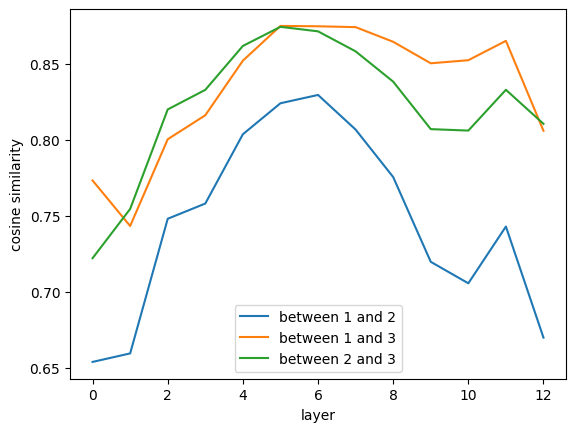

In [ ]:
text1 = "We will rob a bank next week!"
text2 = "Let's put our savings into a bank account."
text3 = "We will steal some money from the bank."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

<a name='e5'></a>
### Exercise 5 (5 points)

Try out your sentence embeddings on different sentences. Inspect the results in terms of the different layers. Comment on the results. Are they expected?

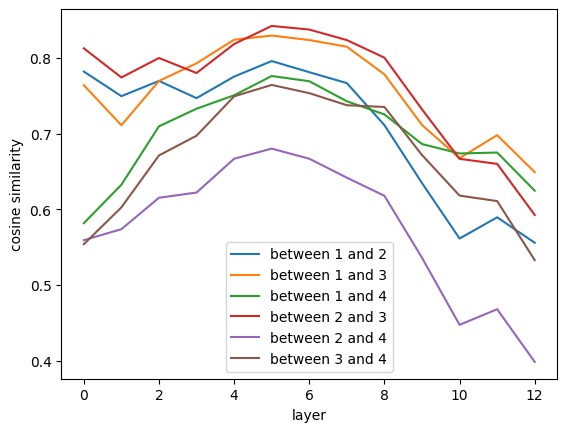

In [ ]:
### YOUR CODE HERE

text1 =  "The bat flew out of the cave when the sun went down."
text2 =  "He swung the bat and hit a home run."
text3 =  "She used a bat to break open the pinata."
text4 =  "Bats often sleep hanging upside down."

tokenized = tokenizer([text1, text2, text3,text4], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

### YOUR CODE ENDS HERE

- The similarity between 1 and 4 increases to its peak in layers 4-8, reaching 0.75, indicating that both sentences talk about bat as an animal. The drop in similarity in the higher layers is possibly due to the detailed distinctions.

- The similairy between 1-2 and 1-3, decreases because it reflects that BERT interprets the different meanings of the word bat.

- The similairty between 2 and 3 increases and reaches its peak at the middle layers (4-8) with a similarity score of 0.9+ due to similar sentence structures and context (tool and equipment)

- The similairty between 2 and 4 increases slightly, but is still relatively low with the highest similarity score being >0.65.

All the above results are expected but the results between 3 and 4 which reaches 0.75 and has a similar trend as the similarity of 1 and 4 which is a weird due to the fact that in 3 the word bat refers to the club and in 4 as the animal. It is important to add that as the layers progress the similarity between 3 and 4 have a sharper decrease than 1 and 4, which indicates that the model captures the different contextual meanings.

Generally, all sentence combinations show a peak similarity around layers 4-8, suggesting these layers capture a balance between syntax and semantic information. The similarity then drops in the higher layers (9-12) indicating that in these layers the model is capturing more specific semantic distinctions.

### 3.1 Applying BERT sentence embeddings

Next, we will be calculating the word embeddings on our dataset. This is the moment where having GPU will greatly speed up the computations.

As mentioned before, we can use Google Colab [https://colab.google/](https://colab.google/) for this purpose. It gives you access to a GPU for a limited time (after you used this time you will have to wait for some time to use it again). To use a GPU you need to select the runtime type. Go to "Runtime -> Change runtime type". There you can select a CPU or a GPU.

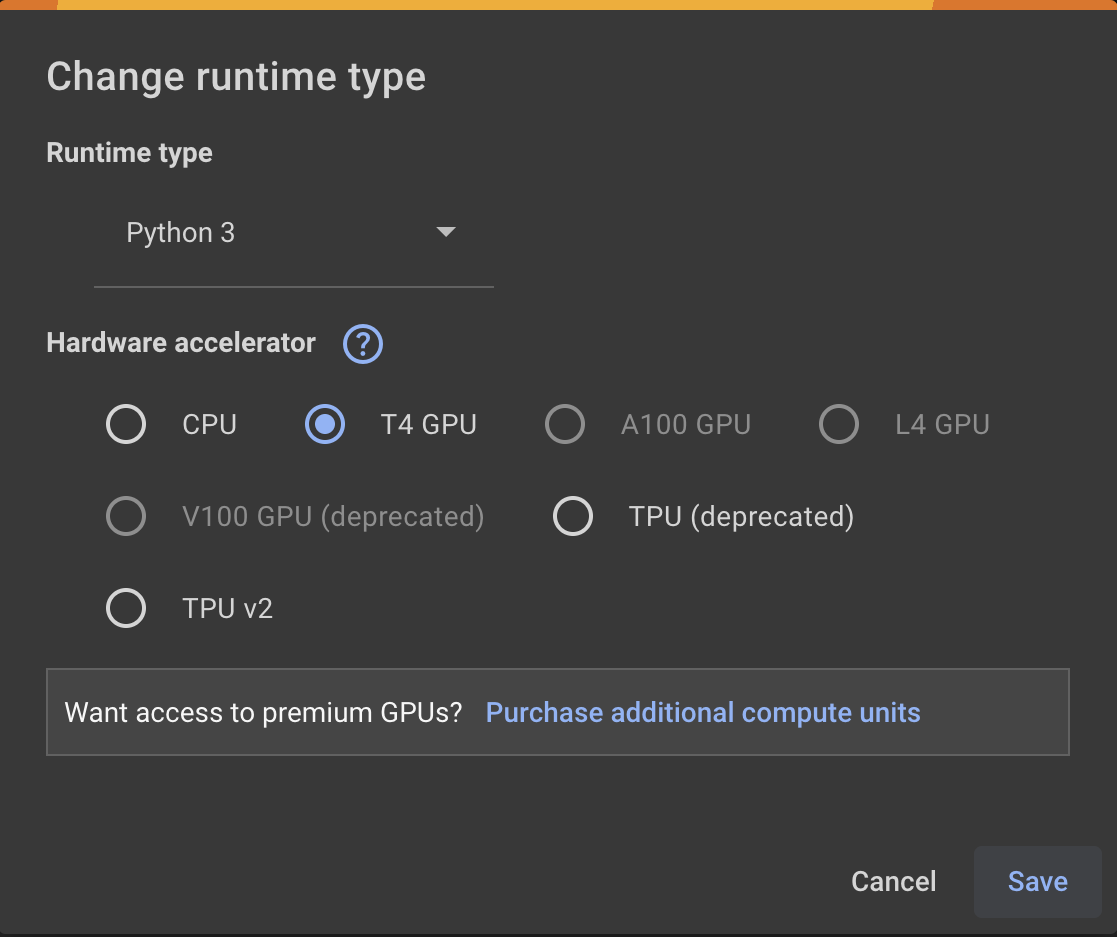

It might be a good idea to first work on a CPU with a slice of the dataset until your code works without problems. Then you can switch to a GPU runtime and work on the whole dataset. Notice that you will have to run all the cells again as the change of the runtime will effectively start a fresh session.

If you have a GPU locally, you don't need to do that, and you can work on the whole dataset from the get go.

To select a portion of the dataset uncomment the following cell. Make sure to comment it again when you are ready to run the notebook on the notebook on the GPU.

In [ ]:
test_ds = test_ds.select(range(5000))

<a name='e6'></a>
### Exercise 6 (3 points)

We will first tokenize the dataset. Write two functions that will tokenize the two columns - `sentence` and `compressed` - separately. Do not use padding when tokenizing, as we will later use [DataCollator](https://huggingface.co/docs/transformers/en/main_classes/data_collator) to "pack and pad" the examples to form batches.

If you have any doubts please check the following [tutorial](https://huggingface.co/docs/datasets/use_dataset) on Huggingface.

In [ ]:
def tokenize_sentence(examples):
    """
    Tokenizes the `sentence` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `sentence` column (returns the whole output of the tokenizer)

    """
    ### YOUR CODE HERE


    tokenized_sentence = tokenizer(examples['sentence'], truncation = True )


    ### YOUR CODE ENDS HERE

    return tokenized_sentence


def tokenize_compressed(examples):
    """
    Tokenizes the `compressed` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `compressed` column (returns the whole output of the tokenizer)

    """

    ### YOUR CODE HERE


    tokenized_compressed = tokenizer(examples['compressed'], truncation = True)


    ### YOUR CODE ENDS HERE

    return tokenized_compressed

In the next cell, we will apply the functions that you implemented on the dataset (using `map()` method). We will do it twice to obtain two separate datasets for full and compressed sentence each. Notice that we drop the original columns when we form the new datasets.

In [ ]:
tokenized_sentence_ds = test_ds.map(tokenize_sentence, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

tokenized_compressed_ds = test_ds.map(tokenize_compressed, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5000
})


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5000
})


Let's examine the first few examples from both datasets. Make sure that they make sense to you.

In [ ]:
print(tokenized_sentence_ds[0:3])
print(tokenized_compressed_ds[0:3])

{'input_ids': [[101, 7513, 24494, 2015, 4354, 4007, 3976, 1010, 2414, 3665, 4152, 2439, 3200, 2291, 1010, 5371, 1011, 3745, 2869, 2024, 2502, 5247, 2545, 2205, 1010, 1998, 23307, 5338, 1999, 18856, 13369, 5679, 1012, 102], [101, 1037, 4724, 1011, 2095, 1011, 2214, 26276, 6432, 2038, 2042, 5338, 2007, 26563, 2098, 15198, 4028, 2005, 9382, 6012, 2010, 2117, 2564, 2000, 2331, 2058, 1036, 1036, 2155, 5966, 1010, 1005, 1005, 1037, 8268, 2880, 2056, 2006, 9857, 1012, 102], [101, 2047, 4751, 2024, 8361, 2055, 1037, 5116, 17025, 3347, 2954, 2008, 5565, 2093, 17523, 2869, 1999, 7173, 1998, 2178, 2158, 1999, 1996, 2902, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1,

In the following cell you can find the function that will apply the provided sentence embedding function to the dataset. It uses the DataCollator we metioned earlier (you are welcome to check the documentation: [https://huggingface.co/docs/transformers/en/main_classes/data_collator](https://huggingface.co/docs/transformers/en/main_classes/data_collator)).

In [ ]:
from torch.utils.data.dataloader import DataLoader

def embed_dataset(dataset, model, sentence_embedding_fn, batch_size=8):
    data_collator = transformers.DataCollatorWithPadding(tokenizer)
    data_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=data_collator)
    sentence_embeddings = []
    with torch.no_grad():
        for batch in tqdm.tqdm(data_loader):
            batch.to(device)
            model_output = model(**batch, output_hidden_states=True)
            batch_sentence_embeddings = sentence_embedding_fn(batch, model_output)
            sentence_embeddings.append(batch_sentence_embeddings.detach().cpu())

    sentence_embeddings = torch.concat(sentence_embeddings, dim=0)
    return sentence_embeddings

We will embed the dataset containing sentences by using the function from the previous cell. We will pass your `calculate_sentence_embeddings` function. By default, this function uses the hidden representations of the last layer.

If you are not using a GPU this can take some time depending on your system and your implementation.

To use different layer you can pass different value for the `layer` parameter using python's `functools.partial` function ([https://docs.python.org/3/library/functools.html#functools.partial](https://docs.python.org/3/library/functools.html#functools.partial)).

In [ ]:
sentence_embeddings = embed_dataset(tokenized_sentence_ds, model, calculate_sentence_embeddings)
print(sentence_embeddings.shape)

100%|██████████| 625/625 [14:11<00:00,  1.36s/it]

torch.Size([5000, 768])


The following cell will embed the compressed sentences. Make sure to pass the same function for calculating the sentence embeddings.

In [ ]:
compressed_embeddings = embed_dataset(tokenized_compressed_ds, model, calculate_sentence_embeddings)
print(compressed_embeddings.shape)

100%|██████████| 625/625 [05:38<00:00,  1.85it/s]

torch.Size([5000, 768])


## 4. Retrieving Sentences

Guess what? We are going to try the same task/dataset as the previous lab and hopefully get better performance.

As a reminder, we will be using vector representations (based on the BERT embeddings) to retrieve only the relevant ones based on some user query. It is similar to the a search retrieval task (based on what we discussed in the relevant lecture) where a user provides a query (that is the compressed sentence) and the system returns the sentences that are more similar to the query.

In the information retrieval lecture, we discussed how to solve this retrieval problem by using bag-of-words as a representation basis. In Lab 2, we solved the problem using static word embeddings (learned from our corpus) and by averaring their equivalent vectors per sentence. Now, we are going to use the BERT model (we loaded above) to get contextualized sentence embeddings! Are you as excited as we are?

<a name='e7'></a>
### Exercise 7 (3 points)

First step to a retrieval task is to embed the query (aka find a proper vector representation). We will do it the same way as we did it in the previous exercises. Complete the following function to return the embedding of the provided text.

In [ ]:
def embed_query(query, sentence_embedding_fn):
    """
    Embeds the provided query using the model and the `sentence_embedding_fn` function
    Args:
        query: a str with the query
        sentence_embedding_fn: the function used to embed the sentence based on the input and output of the model

    Returns: a PyTorch tensor with the embedded query

    """

    #### YOUR CODE HERE

    #Tokenize the query (chat GPT helped me with .to(device))
    tokenized_query = tokenizer(query, return_tensors='pt', truncation=True).to(device)

    #Chat helped with this completely, had no idea how to do it. It passes the query through the model in order to obtain the output
    with torch.no_grad():
        model_output = model(**tokenized_query, output_hidden_states=True)

    ### YOUR CODE ENDS HERE

    query_embedding = sentence_embedding_fn(tokenized_query, model_output)

    return query_embedding.detach().cpu()


Next we will embed the query (which is the same as in the previous lab). What is the dimensionality of the embedding?

In [ ]:
query = "volcano erupted"
print(query)

query_embedding = embed_query(query, calculate_sentence_embeddings)
print(query_embedding.shape)
#print(query_embedding)

volcano erupted
torch.Size([1, 768])


<a name='e8'></a>
### Exercise 8 (3 points)

The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case).

The corresponding function from the previous lab would actually work without changes, as PyTorch's tensors are automatically cast into numpy arrays. That said, convert the function into PyTorch to see how the two libraries are similar to each other.

Note that the `other_vectors` parameter is a single PyTorch tensor of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

In [ ]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a tensor representing a vector of D dimensions
        other_vectors: a 2D tensor representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """
    #### YOUR CODE HERE

    #code from previous lab but using torch

    #We have to normalize the input vector to have a unit form, because cosine similarity is scale-invariant (ChatGPT helped me with this for intrerpretation purposes)
    vector_norm = torch.norm(vector)
    if vector_norm == 0:
        print('Zero vector')
    vector_unit = vector / vector_norm

    #Do the same for the other_vectors , axis=1 is columns
    other_vectors_norm = torch.norm(other_vectors, dim = 1 , keepdim = True)
    other_vectors_unit = other_vectors / other_vectors_norm

    cosine_similarities = torch.matmul(other_vectors_unit,vector_unit)

    return cosine_similarities.cpu().numpy()

    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [ ]:
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)
print(query_similarity.shape)
print(query_similarity[:10])

(5000,)
[0.47749817 0.4168833  0.501148   0.3710695  0.48699096 0.4608022
 0.3499907  0.39426565 0.41947043 0.43060678]


The following cell will select the most similar sentence.

In [ ]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(test_ds[most_similar]['sentence'])

658
0.5812642
A volcano in southern Japan erupted Tuesday, sending cinders more than a mile from the crater, The Straits Times reports.


The following function will return the indices of the top-k elements in the array.

In [ ]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [ ]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

A volcano in southern Japan erupted Tuesday, sending cinders more than a mile from the crater, The Straits Times reports.
similarity: 0.5812641978263855
Bridge closure concerns Grimsby merchants.
similarity: 0.5801449418067932
Toll plaza attendant was threatened by four men in Ropar.
similarity: 0.5761352777481079
A British oil worker has died in Azerbaijan.
similarity: 0.5626015663146973
Two children drowned in the Saryu canal on Thursday.
similarity: 0.5569742918014526
FIRE destroyed property of unknown value at a furniture workshop in Siakago town on Sunday evening.
similarity: 0.5483207702636719
A three-alarm fire destroyed a house in Montgomery County this afternoon.
similarity: 0.5450170040130615
Barbara makes landfall in SE Mexico; significant rainfall and life-threatening mud-slides and flash-flooding possible.
similarity: 0.5425763130187988
Two Chicago firefighters die and 17 people are injured on Wednesday.
similarity: 0.5423405170440674
A sixth severed foot has washed up on 

<a name='e9'></a>
### Exercise 9 (5 points)

Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).

Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 5 from each category). Try to provide reasons for the good/bad result in each case. Optionally, if you completed the previous lab, try the examples from that case. What do you observe?

In [ ]:
#### YOUR CODE HERE
query = "AI in healthcare"

query_embedding = embed_query(query, calculate_sentence_embeddings)

query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)

top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

print("\n Query2")

query2 = "Stock market crash"

query_embedding2 = embed_query(query2, calculate_sentence_embeddings)

query_similarity2 = cosine_similarity_1_to_n(query_embedding2[0], sentence_embeddings)

top_indices = top_k_indices(query_similarity2, k=10).tolist()

for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity2[idx]}')

print("\n Query3")

query3 = "Climate change impact on the world"

query_embedding3 = embed_query(query3, calculate_sentence_embeddings)

query_similarity3 = cosine_similarity_1_to_n(query_embedding3[0], sentence_embeddings)

top_indices = top_k_indices(query_similarity3, k=10).tolist()

for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity3[idx]}')



### YOUR CODE ENDS HERE

Surgical quality program participation can cut complication and mortality rates.
similarity: 0.6251987814903259
Social media have really changed different areas of human life, including the career environment.
similarity: 0.5769158005714417
Promiscuity may alter DNA and boost immunity in mice, according to new research.
similarity: 0.5752803683280945
Langes+ - Applying international financial reforms locally In Reform of global banking regulation:
similarity: 0.5637484788894653
Bayer MaterialScience is meeting the challenges of increasing urbanization with cross-industry concepts for sustainable urban development.
similarity: 0.5605437755584717
UK-based Meddserve said it plans to showcase the world's first fully integrated online hospital management system at Arab Health 2009.
similarity: 0.5460692644119263
Creation of more jobs, reasonably high wages for same type of work and innovations can lead to inclusive growth in the Economy, according to the Nobel Laureate Edmund Phelps.
simila

##Good results

    Query: "AI in healthcare"

  Result: Dell acquisition helps healthcare push, e-medical records raise privacy questions, and health portals grow but profits low.

  Reason: This result is related to healthcare and mentions techological advancements in technology which fits well with the query about AI in healthcare.

    Query: "Stock market crash"

   Result: The stock market extended its slide as investors worried that a weak job market will trip up a recovery in the economy.

   Reason: This result is directly related to the stock market and its downfall, fitting perfectly with the query.


    Query: "Stock market crash"

   Result: Stocks and commodities fell around the world on concern swine flu will damp a global economic recovery and US regulators will make banks raise capital after failing so-called stress tests.

   Reason: This result involves stock market movements and an economic context, relevant to the query.

    Query: "Climate change impact on the world"

   Result: Global warming will turn clouds into heat traps, worsening the greenhouse gas effects, and chances that clouds will save us from climate change are low, an expert says.

   Reason: This result is directly related to climate change and its impact on the enviroment globally, fitting well with the query.

    Query: "Climate change impact on the world"

   Result: No doubt there will be enough hot air to keep climate change on the agenda for many years to come!

   Reason: This result mentions climate change directly and its consequences in the long run, relevant to the query.

##Bad results

    Query: "AI in healthcare"

  Result: Golf fitness exercises developing strength in the hips are a key component to improvement within the golf swing..

  Reason: This result is unrelated to AI and healthcare and seems to have been included due to some shared words (in) in the embeddings

    Query: "Stock market crash"

   Result: The Australian stock market is trading higher on Monday despite a weak lead from Wall Street, where stocks closed little changed on Friday.

   Reason: This result talks about positive trading day, which is the opposite context of the query, indicating a misunderstanding of the query context.


    Query: "AI in healthcare"

   Result: MPA announced it has developed voluntary tablet metrics guidelines.

   Reason: This result is more related to technology and metric rather than Ai in healthcare , showing limiation in context understanding

    Query: "Climate change impact on the world"

   Result: The United Nations warned that the global economic crisis could create up to 100 million ``new hungry'' as it wipes out jobs in poorer countries.

   Reason: This result is about the gobal economic crisis, not about climate change.

    Query: "Climate change impact on the world"

   Result: Internally displaced persons, or IDPs, are among the world's most vulnerable people

   Reason: This result discusses displacement issues, not climate change issues.



Generally, query 2 and 3 have better results than quey 1. The model fails when the query involves complex contexts and broader themes like AI








## 5. Evaluating Retrieval

In this section (as with the previous lab) we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e10'></a>
### Exercise 10 (5 points)

In this exercise you will revisit your implementation of the cosine siliarity. Generalize it so that it can accept two PyTorch tensors containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be a tensor of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [ ]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE

    #normalize the input vectors
    vectors_norm = torch.norm(vectors, dim=1, keepdim=True)
    vectors_unit = vectors / vectors_norm

    #normalize the other vectors
    other_vectors_norm = torch.norm(other_vectors, dim=1, keepdim=True)
    other_vectors_unit = other_vectors / other_vectors_norm

    #compute the cosine similarity using matrix multiplication
    cosine_similarities = torch.matmul(vectors_unit, other_vectors_unit.T)

    return cosine_similarities

    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [ ]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    if batch_size is None:
        batch_size = n_queries

    n_batches = math.ceil(n_queries / batch_size)
    last_batch_size = n_queries % batch_size if n_queries != batch_size else batch_size

    correct = np.zeros(n_queries).astype(bool)
    with tqdm.tqdm(total=n_queries) as pbar:
        for b in range(n_batches):
            effective_batch_size = last_batch_size if b == (n_batches - 1) else batch_size
            batch_start_index = b * batch_size

            queries_batch = queries[batch_start_index:batch_start_index + effective_batch_size]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i in range(effective_batch_size):
                query_index = i + batch_start_index
                query_similarity = batch_similarity[i]
                top_k = top_k_indices(query_similarity, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    n_correct = np.sum(correct)
    n_total = correct.shape[0]
    recall = n_correct / n_total
    return recall

You can use it like so:

In [ ]:
recall_at_1 = calculate_recall(compressed_embeddings, sentence_embeddings, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

 80%|████████  | 4000/5000 [00:01<00:00, 2920.19it/s]


50.64%


<a name='e11'></a>
### Exercise 11 (5 points)

Calculate recall for different values of $K$. Comment on how recall changes based on the value of $K$. Are the results expected or surprising? Comment again on different examples (like in Exercise 9) but now take into account the results of recall at different levels of $K$.

At this stage, do not experiment further. That will come in the next Sections which are more open ended.

In [ ]:
#### YOUR CODE HERE

#code from previous lab
def evaluate_recall_at_k(queries, sentences, max_k, batch_size=1000):
    recalls = []
    for k in range(1, max_k+1):
        recall = calculate_recall(queries, sentences, k, batch_size)
        recalls.append(recall)
        print(f'Recall@{k}: {recall * 100:.2f}%')
    return recalls

recall_at_k = evaluate_recall_at_k(compressed_embeddings, sentence_embeddings,10)

# query = "AI in healthcare"

# query_embedding = embed_query(query, calculate_sentence_embeddings)

# query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)

# top_indices = top_k_indices(query_similarity, k=10).tolist()
# for idx in top_indices:
#     print(split_ds['test'][idx]['sentence'])
#     print(f'similarity: {query_similarity[idx]}')

# print("\n Query2")

# query2 = "Stock market crash"

# query_embedding2 = embed_query(query2, calculate_sentence_embeddings)

# query_similarity2 = cosine_similarity_1_to_n(query_embedding2[0], sentence_embeddings)

# top_indices = top_k_indices(query_similarity2, k=10).tolist()

# for idx in top_indices:
#     print(split_ds['test'][idx]['sentence'])
#     print(f'similarity: {query_similarity2[idx]}')

# print("\n Query3")

# query3 = "Climate change impact on the world"

# query_embedding3 = embed_query(query3, calculate_sentence_embeddings)

# query_similarity3 = cosine_similarity_1_to_n(query_embedding3[0], sentence_embeddings)

# top_indices = top_k_indices(query_similarity3, k=10).tolist()

# for idx in top_indices:
#     print(split_ds['test'][idx]['sentence'])
#     print(f'similarity: {query_similarity3[idx]}')

### YOUR CODE ENDS HERE

 80%|████████  | 4000/5000 [00:01<00:00, 2308.24it/s]


Recall@1: 50.64%


 80%|████████  | 4000/5000 [00:00<00:00, 4336.64it/s]


Recall@2: 57.24%


 80%|████████  | 4000/5000 [00:00<00:00, 4308.33it/s]


Recall@3: 60.06%


 80%|████████  | 4000/5000 [00:00<00:00, 4358.18it/s]


Recall@4: 62.02%


 80%|████████  | 4000/5000 [00:00<00:00, 4307.35it/s]


Recall@5: 63.38%


 80%|████████  | 4000/5000 [00:00<00:00, 4296.23it/s]


Recall@6: 64.72%


 80%|████████  | 4000/5000 [00:00<00:00, 4060.92it/s]


Recall@7: 65.80%


 80%|████████  | 4000/5000 [00:00<00:00, 4309.56it/s]


Recall@8: 66.72%


 80%|████████  | 4000/5000 [00:00<00:00, 4314.73it/s]


Recall@9: 67.38%


 80%|████████  | 4000/5000 [00:00<00:00, 4301.86it/s]

Recall@10: 68.00%


Recall increases as K increases. This is an expected outcome because as more candidates are considered, there is a higher probability that the correct sentence will be included in the top K retrieved results. Furthermore, the initial jumps are more significant (from 49% (K=1) to 57% (K=2)), but as K continues to increase, the incremental gains become smaller. This makes sense in retrieval tasks, where the most relevant results tend to be ranked higher.


## 6. Pushing the performance: Modifying the sentence embeddings


<a name='e12'></a>
### Exercise 12 (10 points)

Experiment with the way the sentence embedding is calculated and check performance on the task.

For example, you can try using the embedding of the `CLS` token or averaging the hidden states of different layer or even averaging the representations of several layers. The choice is yours, but make sure to give a justification of your choice, based on the results and your inspection of the dataset. Make sure to inspect the representations of tokens and sentences and do not forget to evaluate the modification on the sentence retrieval task.

In [ ]:
#### YOUR CODE HERE

def calculate_sentence_embeddings_avg_num_of_layers(input_batch, model_output, layer=-1 , num_layers=15):

    hidden_states = model_output['hidden_states']
    attention_mask = input_batch['attention_mask']

    # Average the hidden states across the last 15 layers

    layers_to_average = hidden_states[-num_layers:]

    mean_hidden_states = torch.mean(torch.stack(layers_to_average), dim=0)

    mask_expanded = attention_mask.unsqueeze(-1).expand(mean_hidden_states.size()).float()

    mask_hidden_states = mean_hidden_states * mask_expanded

    sum_embeddings = mask_hidden_states.sum(dim=1)

    val_token_counts = mask_expanded.sum(dim=1)

    sentence_embeddings = sum_embeddings / val_token_counts

    return sentence_embeddings

sentence2_embeddings = embed_dataset(tokenized_sentence_ds, model, calculate_sentence_embeddings_avg_num_of_layers)
compressed2_embeddings = embed_dataset(tokenized_compressed_ds, model, calculate_sentence_embeddings_avg_num_of_layers)

### YOUR CODE ENDS HERE

100%|██████████| 625/625 [06:01<00:00,  1.73it/s]


In [ ]:
print("Token Embeddings (first sentence):")
print(model_outputs['hidden_states'][-1][0])

print("\nSentence Embeddings:")
print(compressed2_embeddings)

print("\nSentence Embeddings:")
print(sentence2_embeddings)

Token Embeddings (first sentence):
tensor([[ 7.7905e-03,  7.7393e-02, -3.8071e-02,  ..., -1.6090e-01,
          3.9497e-01,  4.5906e-01],
        [ 6.2626e-03, -1.3472e-01, -7.8962e-01,  ..., -1.7357e-01,
          1.0775e+00, -7.8623e-02],
        [ 4.3238e-01, -1.8643e-01, -1.0159e-01,  ..., -3.4244e-01,
          7.3373e-01,  4.2446e-01],
        ...,
        [-9.7882e-04,  2.0248e-01,  3.0758e-01,  ..., -2.2166e-01,
         -1.8754e-01,  1.8368e-01],
        [ 5.3295e-01,  1.3917e-01, -2.3285e-01,  ..., -1.9629e-02,
         -4.5747e-01, -2.5510e-01],
        [ 7.6413e-02,  2.1760e-01,  2.1484e-01,  ..., -1.1075e-01,
         -5.8514e-02, -2.3290e-01]], grad_fn=<SelectBackward0>)

Sentence Embeddings:
tensor([[ 0.1886, -0.3189,  0.1984,  ..., -0.1612,  0.2832,  0.0693],
        [ 0.2156, -0.3283,  0.0668,  ..., -0.2200,  0.1780, -0.2842],
        [ 0.4691, -0.2716, -0.2036,  ..., -0.1378,  0.0445, -0.4241],
        ...,
        [ 0.3091,  0.2311,  0.3769,  ...,  0.0261, -0.1584,  

In [ ]:
def evaluate_recall_at_k(queries, sentences, max_k, batch_size=1000):

    recalls = []
    for k in range(1, max_k+1):
        recall = calculate_recall(queries, sentences, k, batch_size)
        recalls.append(recall)
        print(f'Recall@{k}: {recall * 100:.2f}%')
    return recalls

recall_at_k = evaluate_recall_at_k(compressed2_embeddings, sentence2_embeddings,10)

 80%|████████  | 4000/5000 [00:01<00:00, 3591.05it/s]


Recall@1: 62.96%


 80%|████████  | 4000/5000 [00:01<00:00, 2906.48it/s]


Recall@2: 67.58%


 80%|████████  | 4000/5000 [00:01<00:00, 2784.01it/s]


Recall@3: 69.64%


 80%|████████  | 4000/5000 [00:01<00:00, 3678.30it/s]


Recall@4: 70.82%


 80%|████████  | 4000/5000 [00:00<00:00, 4175.27it/s]


Recall@5: 71.70%


 80%|████████  | 4000/5000 [00:00<00:00, 4098.68it/s]


Recall@6: 72.46%


 80%|████████  | 4000/5000 [00:00<00:00, 4144.40it/s]


Recall@7: 72.86%


 80%|████████  | 4000/5000 [00:00<00:00, 4252.33it/s]


Recall@8: 73.34%


 80%|████████  | 4000/5000 [00:00<00:00, 4270.22it/s]


Recall@9: 73.64%


 80%|████████  | 4000/5000 [00:00<00:00, 4376.29it/s]

Recall@10: 73.98%


I chose to calculate the sentence embeddings by averaging the hidden states from the last 15 layers. The choice of 15 was done from emperical evidence,over this threshold the recall does not improve. The recall at K=1 improved fromm 0.49 to 0.62. The reason for this is because by averaging the hidden states from multiple layers, you combine information from different levels of abstraction. Earlier layers caprture more local syntax information, while deeper layers capture more semantic and contextual information. Averaging these layers results in a more richer represenation of the sentence. Moreover, averaging across multiple layers helps the model to generalize better by reducing the biases of any single layer. In conclusion, the advantages of using multi-layer embeddings over single-layer embeddings are the enhanced representational power and the improved generalization.

## Pushing the performance: Trying different models



<a name='e13'></a>
### Exercise 13 (10 points)

In this exercise you are asked to try other BERT-like model from huggingface. You can consider the MSMARCO model [here](https://huggingface.co/sentence-transformers/msmarco-bert-base-dot-v5). Make sure to read the model card on the huggingface website in order to understand how to use it. You don't need to install `sentence-transformers`.

As before, make sure to inspect the the representations of tokens and sentences. Evaluate the model on sentence retrieval.

In [ ]:
#### YOUR CODE HERE

model = transformers.AutoModel.from_pretrained("sentence-transformers/msmarco-bert-base-dot-v5")

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

sentence3_embeddings = embed_dataset(tokenized_sentence_ds, model, calculate_sentence_embeddings_avg_num_of_layers)

compressed3_embeddings = embed_dataset(tokenized_compressed_ds, model, calculate_sentence_embeddings_avg_num_of_layers)


### YOUR CODE ENDS HERE

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

100%|██████████| 625/625 [05:57<00:00,  1.75it/s]


In [ ]:
def evaluate_recall_at_k(queries, sentences, max_k, batch_size=1000):

    recalls = []
    for k in range(1, max_k+1):
        recall = calculate_recall(queries, sentences, k, batch_size)
        recalls.append(recall)
        print(f'Recall@{k}: {recall * 100:.2f}%')
    return recalls

recall_at_k = evaluate_recall_at_k(compressed3_embeddings, sentence3_embeddings,10)

 80%|████████  | 4000/5000 [00:00<00:00, 5409.22it/s]


Recall@1: 73.40%


 80%|████████  | 4000/5000 [00:00<00:00, 4274.69it/s]


Recall@2: 76.30%


 80%|████████  | 4000/5000 [00:00<00:00, 4361.54it/s]


Recall@3: 77.24%


 80%|████████  | 4000/5000 [00:00<00:00, 4268.87it/s]


Recall@4: 77.74%


 80%|████████  | 4000/5000 [00:00<00:00, 4267.11it/s]


Recall@5: 77.96%


 80%|████████  | 4000/5000 [00:00<00:00, 4355.21it/s]


Recall@6: 78.12%


 80%|████████  | 4000/5000 [00:00<00:00, 4275.17it/s]


Recall@7: 78.30%


 80%|████████  | 4000/5000 [00:00<00:00, 4338.69it/s]


Recall@8: 78.40%


 80%|████████  | 4000/5000 [00:00<00:00, 4299.57it/s]


Recall@9: 78.54%


 80%|████████  | 4000/5000 [00:00<00:00, 4346.05it/s]

Recall@10: 78.66%


In [ ]:
print("Token Embeddings (first sentence):")
print(model_outputs['hidden_states'][-1][0])

print("\nSentence Embeddings:")
print(compressed2_embeddings)

print("\nSentence Embeddings:")
print(sentence2_embeddings)

Token Embeddings (first sentence):
tensor([[-0.2603,  0.0529,  0.6050,  ..., -0.5643,  0.3947, -0.1227],
        [ 0.2685,  0.2436, -0.1411,  ..., -0.4192,  0.4776,  0.3185],
        [ 0.4306, -0.5687,  0.6815,  ..., -0.0748,  0.3246, -0.8743],
        ...,
        [ 0.1293, -0.0877,  0.8333,  ..., -0.7069,  0.1721,  0.1166],
        [-0.5144, -0.5381,  0.3143,  ...,  0.4522,  0.6530, -0.4407],
        [ 0.3601,  0.2022,  0.1179,  ...,  0.1513, -0.2231, -0.0592]],
       grad_fn=<SelectBackward0>)

CLS Token Embeddings:
tensor([[-2.6033e-01,  5.2910e-02,  6.0496e-01,  2.5736e-01, -3.0446e-01,
         -1.3010e-01,  3.4841e-01,  6.8641e-01, -4.1090e-01, -2.7374e-01,
          3.1370e-01, -3.7856e-01, -5.8694e-01,  7.7480e-01, -1.9426e-01,
         -4.4865e-01,  1.1899e-01,  2.9051e-01,  9.2989e-02, -2.3965e-01,
          4.4638e-01, -1.7534e-01,  3.8298e-01, -1.9989e-01, -2.8411e-01,
         -3.8962e-01, -2.0082e-01,  6.3683e-02, -4.7876e-01,  3.4073e-01,
         -1.0280e-01,  4.4914e

// your comments